In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

C:\Users\Rstudio\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [3]:
X = pd.read_csv("C:\\Users\\Rstudio\\Desktop\\코멘토\\train_mdf.csv")
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X.shape # 1460개의 집과 80개의 특징

(1460, 81)

In [5]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
X = X.drop('Id',axis=1)

In [7]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 변수별 분포 보기

## X1 MSSubClass 집의 유형

In [8]:
x1 = X.iloc[:,0]
x1 = pd.DataFrame([str(x) for x in x1])
x1.head()

,0
0,60
1,20
2,60
3,70
4,60


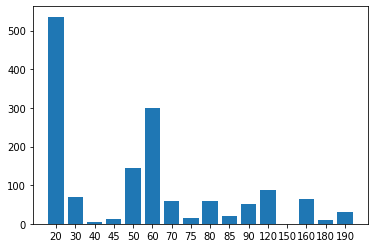

In [9]:
msc = ['20','30','40','45','50','60','70','75','80','85','90','120','150','160','180','190']
y = [int(np.sum(x1==x)) for x in msc]
plt.bar(msc,y)
plt.rcParams["figure.figsize"] = (14,10)

20 1-STORY 1946 & NEWER ALL STYLES와 60 2-STORY 1946 & NEWER 유형이 많다

## X2 MSZoning 땅의 용도

In [10]:
x2 = X.iloc[:,1]
x2.head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

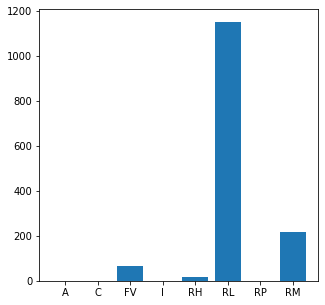

In [13]:
msz = ['A','C','FV','I','RH','RL','RP','RM']
y = [int(np.sum(x2==x)) for x in msz]
plt.bar(msz,y)
plt.rcParams["figure.figsize"] = (1,1)

Residential Low Density의 집들이 많이 팔렸다. 즉 사람들은 인구밀도가 작은 장소를 선호한다고 볼 수 있다. 그러나 집이 더 이상 시중에 나와있지 않아 사지 못했을 가능성이 있으므로 집의 완공연도와 함께 그래프를 그려보자.

In [14]:
x19 = X.iloc[:,18]
x19.head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

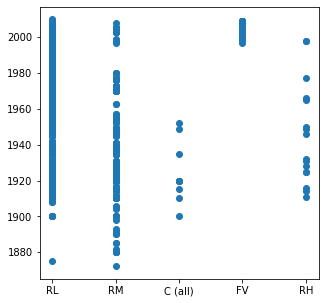

In [17]:
plt.plot(x2,x19, linestyle='none',marker='o')
plt.rcParams["figure.figsize"] = (10,10)

RL, RM, RH가 특정 연도에 쏠리지 않고 꾸준히 지어졌음을 알 수 있다. 사람의 선호에 따라 집이 지어진 것인지 집이 많이 건축되어 사람들이 많이 산 것인지는 잘 모르지만, 어쨌든 FV를 제외하고는 모든 집이 1990년대부터 꾸준히 건축되어 온 사실을 알 수 있다.

## X3 LotFrontage 연결된 도로 (feet)
연결된 street(양쪽에 큰 건물이 있는 도시의 큰 길)의 면적 즉 다른 편의시설로의 접근 용이성 정도로 볼 수 있다  
NA값은 0으로 바꿔준다

In [18]:
x3 = X.iloc[:,2]
x3.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [19]:
np.sum(np.isnan(x3)==True)

259

In [20]:
x3 = x3.fillna(0)

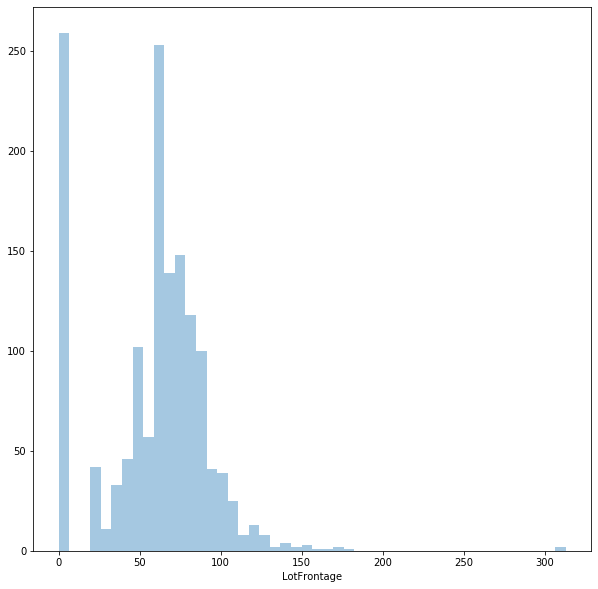

In [22]:
sns.distplot(x3,kde=False)
plt.rcParams["figure.figsize"] = (1,1)

## X4 Lot Area 땅의 넓이

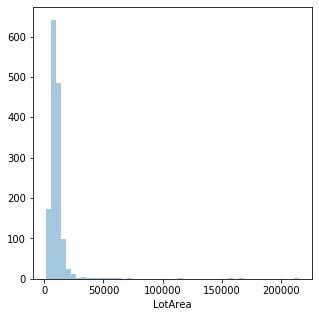

In [25]:
x4 = X.iloc[:,3]
sns.distplot(x4,kde=False)
plt.rcParams["figure.figsize"] = (10,10)

## X5 Street 땅으로 연결된 street 포장/비포장
street: 양쪽에 큰 건물이 있는 도시의 큰 길

In [26]:
x5 = X.iloc[:,4]
x5.head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

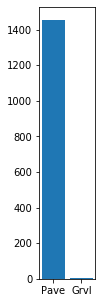

In [28]:
street = ['Pave', 'Grvl']
y = [int(np.sum(x5==x)) for x in street]
plt.bar(street,y)
plt.rcParams["figure.figsize"] = (1,5)

## X6 Alley 땅으로 연결된 alley의 포장/비포장
alley: 건물 사이의 좁은 길  
null값 "None"으로 변환

In [29]:
x6 = X.iloc[:,5]
x6.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

In [30]:
np.sum(pd.isnull(x6)==True)

1369

In [31]:
x6 = x6.fillna("None")
x6.head()

0    None
1    None
2    None
3    None
4    None
Name: Alley, dtype: object

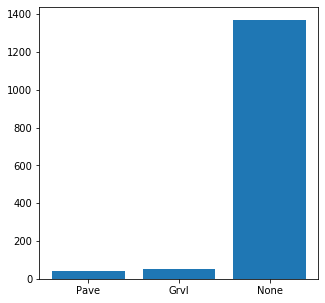

In [35]:
alley = ['Pave', 'Grvl', "None"]
y = [int(np.sum(x6==x)) for x in alley]
plt.bar(alley,y)
plt.rcParams["figure.figsize"] = (10,7)

## X7 LotShape 땅의 모양
Reg->IR1->IR2->IR3으로 갈수록 땅이 이상한 모양, 활용성 떨어질 것을 예측해볼 수 있다

In [33]:
x7 = X.iloc[:,6]
x7.head()

0    Reg
1    Reg
2    IR1
3    IR1
4    IR1
Name: LotShape, dtype: object

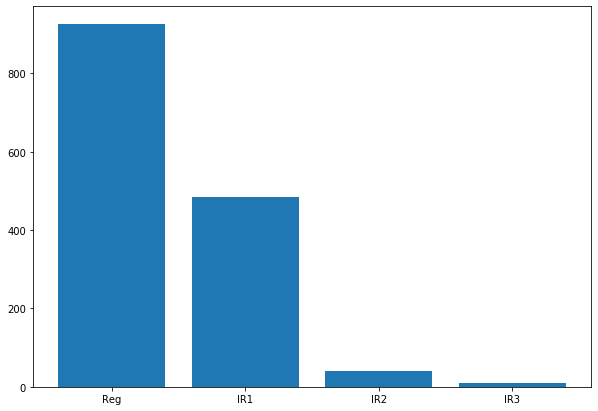

In [34]:
lotshape = ['Reg','IR1','IR2','IR3']
y = [int(np.sum(x7==x)) for x in lotshape]
plt.bar(lotshape,y)
plt.rcParams["figure.figsize"] = (5,5)

## X8 LandContour 땅의 평평한 정도
banked: 도로에서 빌딩까지 급한 오르막길  
depression: 움푹 파인 곳

In [36]:
x8 = X.iloc[:,7]
x8.head()

0    Lvl
1    Lvl
2    Lvl
3    Lvl
4    Lvl
Name: LandContour, dtype: object

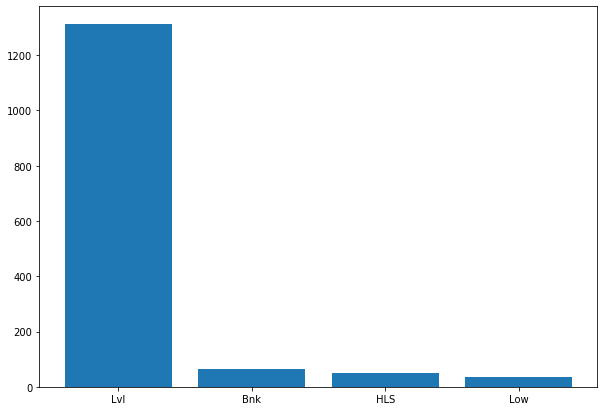

In [37]:
landc = ['Lvl','Bnk','HLS','Low']
y = [int(np.sum(x8==x)) for x in landc]
plt.bar(landc,y)
plt.rcParams["figure.figsize"] = (1,1)

## X9 Utilities 시설 접근성
전기, 가스, 물 사용 가능

In [38]:
x9 = X.iloc[:,8]
x9.head()

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: Utilities, dtype: object

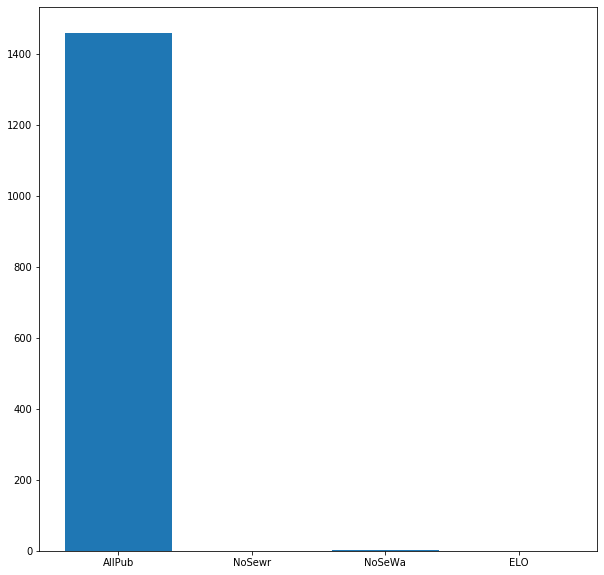

In [40]:
util = ['AllPub','NoSewr','NoSeWa','ELO']
y = [int(np.sum(x9==x)) for x in util]
plt.bar(util,y)
plt.rcParams["figure.figsize"] = (10,10)

## X10 LotConfig 땅의 위치
inside lot: 코너가 아닌 가운데 위치한 건물  
coner lot: 코너에 위치한 땅  
cul-de-sac: 둥글게 막힌 골목

In [41]:
x10 = X.iloc[:,9]
x10.head()

0    Inside
1       FR2
2    Inside
3    Corner
4       FR2
Name: LotConfig, dtype: object

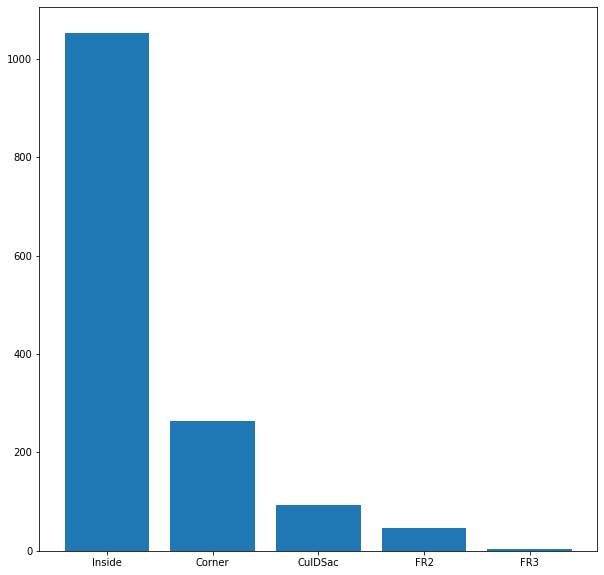

In [42]:
lotcon = ['Inside','Corner','CulDSac','FR2','FR3']
y = [int(np.sum(x10==x)) for x in lotcon]
plt.bar(lotcon,y)
plt.rcParams["figure.figsize"] = (10,10)

## X11 LandSlope 경사의 정도
수치형으로 변환
Gtl -> 0, Mod -> 1, Sev -> 2

In [43]:
x11 = X.iloc[:,10]
x11.head()

0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
Name: LandSlope, dtype: object

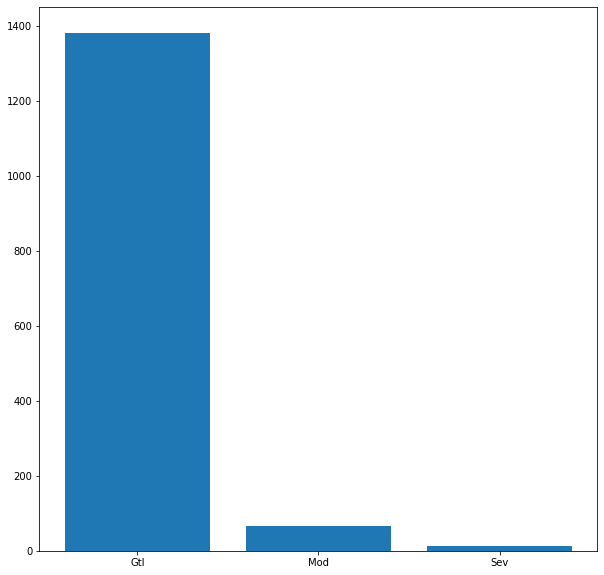

In [44]:
slope = ['Gtl','Mod','Sev']
y = [int(np.sum(x11==x)) for x in slope]
plt.bar(slope,y)
plt.rcParams["figure.figsize"] = (1,1)

## X12 Neighborhood 에임스 도시 내의 위치

In [45]:
x12 = X.iloc[:,11]
x12.head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

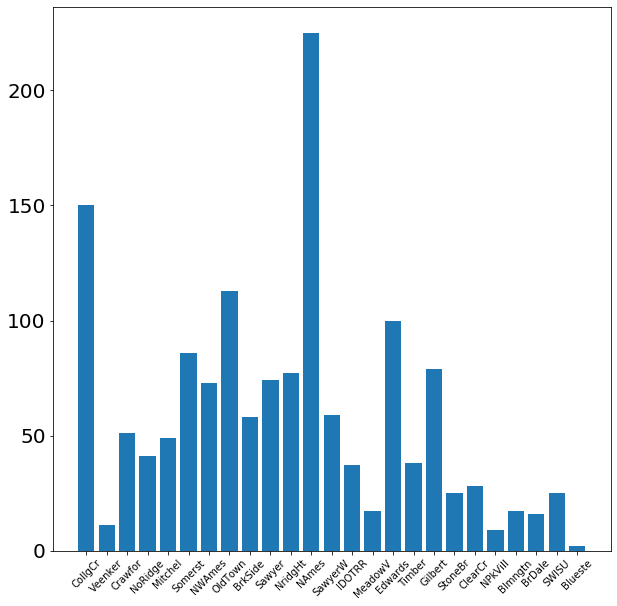

In [50]:
neigh = x12.drop_duplicates()
y = [int(np.sum(x12==x)) for x in neigh]
plt.bar(neigh,y)
plt.rcParams["figure.figsize"] = (1,1)
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)

## X13 Condition1 근처 환경(도로, 공원 등)
artery: 교통의 중심도로  
feeder: 중심도로로 연결되는 비교적 작은 도로

In [51]:
x13 = X.iloc[:,12]
x13.head()

0     Norm
1    Feedr
2     Norm
3     Norm
4     Norm
Name: Condition1, dtype: object

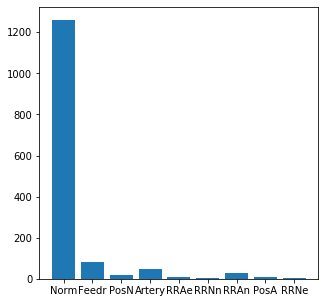

In [53]:
cond1 = x13.drop_duplicates()
y = [int(np.sum(x13==x)) for x in cond1]
plt.bar(cond1,y)
plt.rcParams["figure.figsize"] = (10,10)

## X14 Condition2 더 많은 특성
x13과 값이 같은 것은 추가적인 특성이 없는 것으로 None으로 처리

In [54]:
x14 = X.iloc[:,13]
x14.head()

0    Norm
1    Norm
2    Norm
3    Norm
4    Norm
Name: Condition2, dtype: object

In [55]:
for i in range(len(x13)):
    if x13[i] == x14[i]:
        x14[i] = "None"
x14.head()

C:\Users\Rstudio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    None
1    Norm
2    None
3    None
4    None
Name: Condition2, dtype: object

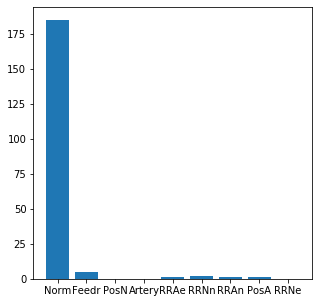

In [61]:
cond1 = x13.drop_duplicates()
y = [int(np.sum(x14==x)) for x in cond1]
plt.bar(cond1,y)
plt.rcParams["figure.figsize"] = (5,5)

## X15 BldgType 집의 type
1Fam: 다른 주택과 떨어져 있는 집  
2FmCon: 1Fam보다 더 좁고 덜 private 할 것으로 예상  
Duplex: 두 채가 붙어서 지어졌지만 한 개인이 두 채 모두에 사는 거주형태  
TwnhsE: 한쪽에만 이웃  
Twnhsl: 양쪽에 이웃

In [62]:
x15 = X.iloc[:,14]
x15.head()

0    1Fam
1    1Fam
2    1Fam
3    1Fam
4    1Fam
Name: BldgType, dtype: object

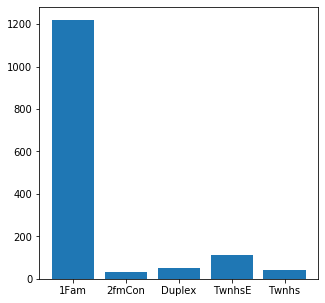

In [63]:
bldgtype = x15.drop_duplicates()
y = [int(np.sum(x15==x)) for x in bldgtype]
plt.bar(bldgtype,y)
plt.rcParams["figure.figsize"] = (5,5)

## X16 HouseStyle 층, 현관 등

In [65]:
x16 = X.iloc[:,15]
x16.head()

0    2Story
1    1Story
2    2Story
3    2Story
4    2Story
Name: HouseStyle, dtype: object

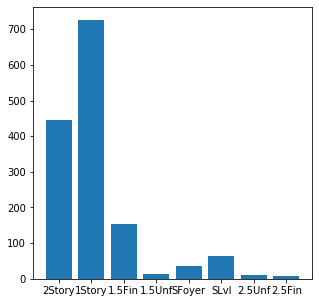

In [66]:
hstyle = x16.drop_duplicates()
y = [int(np.sum(x16==x)) for x in hstyle]
plt.bar(hstyle,y)
plt.rcParams["figure.figsize"] = (5,5)

## X17 OverallQual 전체적인 Quality
Quality는 태초의 상태, Condition은 현재 상태  
quality가 좋고 condition이 좋다면 +  
quality가 좋고 condition이 안좋다면 -  
quality가 안좋고 condition이 좋다면 -  
quality가 안좋고 condition이 안좋다면 -

In [67]:
x17 = X.iloc[:,16]
x17.head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

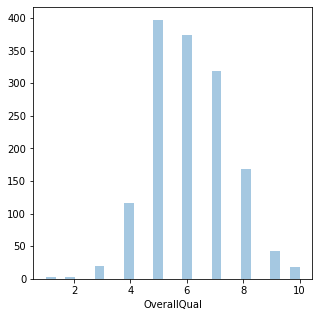

In [68]:
sns.distplot(x17,kde=False)

## X18 OverallCond 전체적인 관리상태

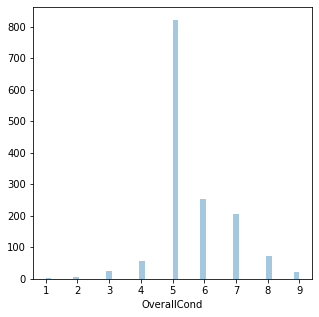

In [69]:
x18 = X.iloc[:,17]
sns.distplot(x18,kde=False)

## X19 Year Built 축조연대

In [70]:
x19 = X.iloc[:,18]
x19.head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

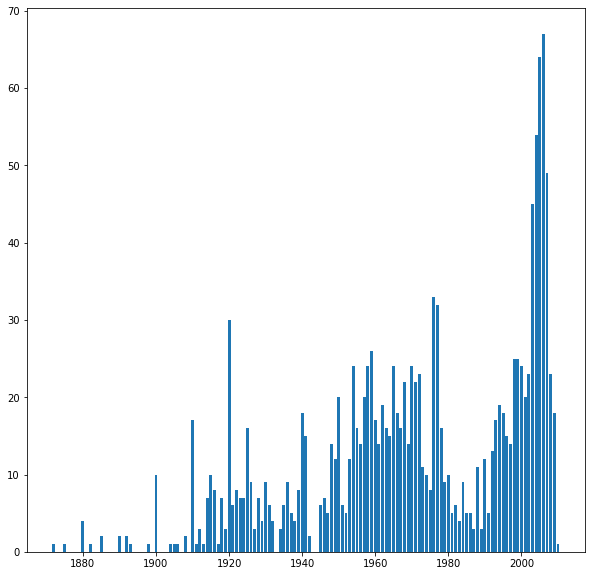

In [73]:
ybuilt = x19.drop_duplicates()
y = [int(np.sum(x19==x)) for x in ybuilt]
plt.bar(ybuilt,y)
plt.rcParams["figure.figsize"] = (20,20)

## X20 YearRemodAdd 재건축연대
축조연대를 X, 재건축연대를 Y

In [75]:
x20 = X.iloc[:,19]
x20.head()

0    2003
1    1976
2    2002
3    1970
4    2000
Name: YearRemodAdd, dtype: int64

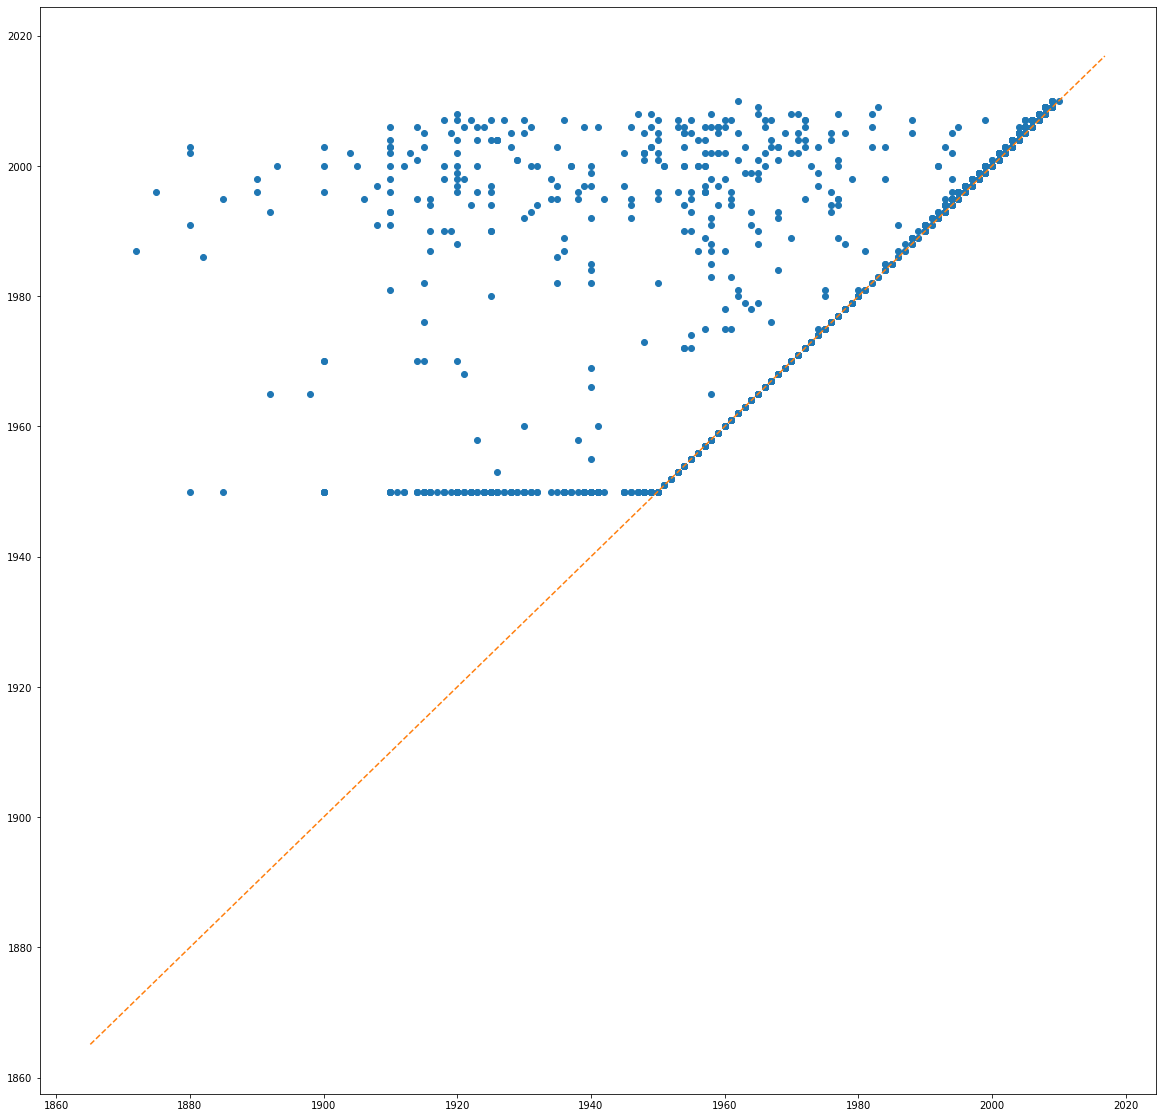

In [79]:
plt.plot(x19,x20,linestyle='none',marker='o')
abline(1,0)

## X21 RoofStyle 집붕의 형태
gable: 박공 지붕, 세모난 형태  
gambrel: 팔각형윗부분같이 생긴 지붕  
hip: 삼각기둥을 옆으로 눕혀놓은 것처럼 생긴 지붕  
shed: 경사진 지붕

In [80]:
x21 = X.iloc[:,20]
x21.head()

0    Gable
1    Gable
2    Gable
3    Gable
4    Gable
Name: RoofStyle, dtype: object

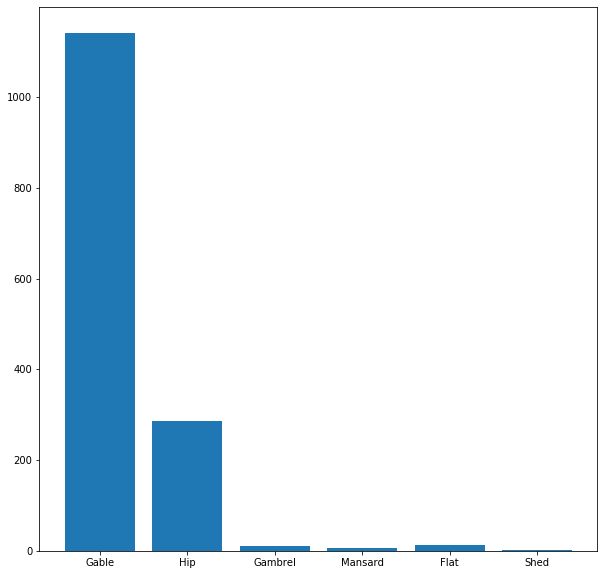

In [83]:
roofs = x21.drop_duplicates()
y = [int(np.sum(x21==x)) for x in roofs]
plt.bar(roofs,y)
plt.rcParams["figure.figsize"] = (1,1)

## X22 RoofMatl 지붕의 재료

In [84]:
x22 = X.iloc[:,21]
x22.head()

0    CompShg
1    CompShg
2    CompShg
3    CompShg
4    CompShg
Name: RoofMatl, dtype: object

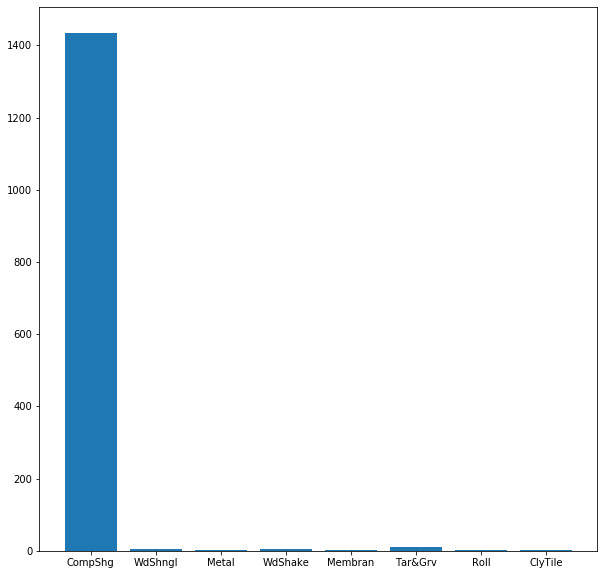

In [87]:
roofm = x22.drop_duplicates()
y = [int(np.sum(x22==x)) for x in roofm]
plt.bar(roofm,y)
plt.rcParams["figure.figsize"] = (20,20)

## X23 Exterior 1st 집 외관의 재료
## X24 Exterior 2nd 집 외관의 재로
둘을 합치기

In [104]:
x23 = X.iloc[:,22]
x24 = X.iloc[:,23]

for i in range(len(x23)):
    if x23[i] == x24[i]:
        x24[i] = "one material only"
x24.head()

C:\Users\Rstudio\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    one material only
1    one material only
2    one material only
3              Wd Shng
4    one material only
Name: Exterior2nd, dtype: object

## X25 MasVnrType (벽돌) 베니어 벽 재료

In [119]:
x25 = X.iloc[:,24]
x25.head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [123]:
np.sum(pd.isnull(x25)==True)

8

In [124]:
x25 = x25.fillna("NoMasVnr")

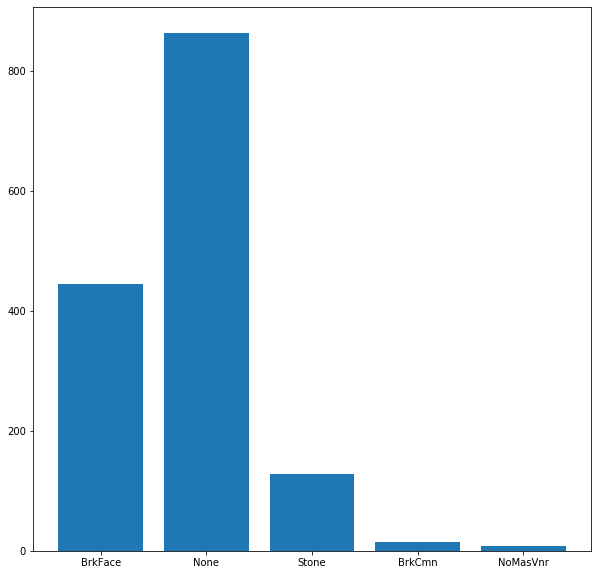

In [127]:
mvtype = x25.drop_duplicates()
y = [int(np.sum(x25==x)) for x in mvtype]
plt.bar(mvtype,y)
plt.rcParams["figure.figsize"] = (1,1)

## X26 MasVnrArea (벽돌) 베니어 벽 넓이
nan값도 0으로 처리

In [135]:
x26 = X.iloc[:,25]
x26.head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [136]:
np.sum(pd.isnull(x26)==True)

8

In [137]:
x26 = x26.fillna(0)

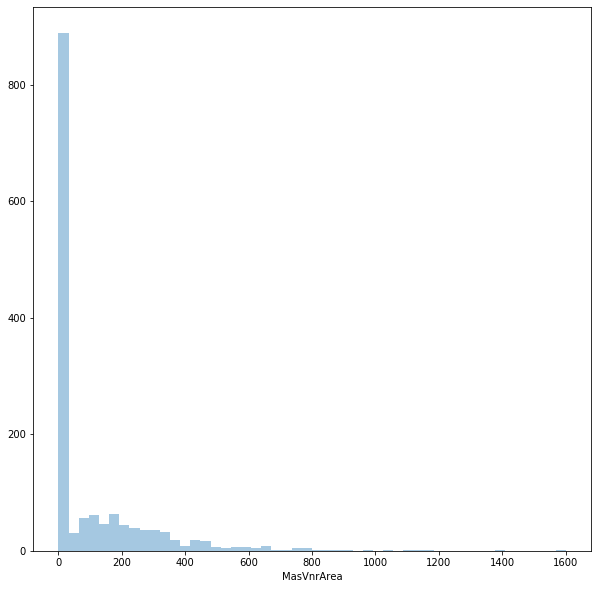

In [139]:
plt.figure(figsize=(10,10))
sns.distplot(x26,kde=False)

## X27 ExterQual 집 외관 재료의 quality
수치화 가능

In [140]:
x27 = X.iloc[:,26]
x27.head()

0    Gd
1    TA
2    Gd
3    TA
4    Gd
Name: ExterQual, dtype: object

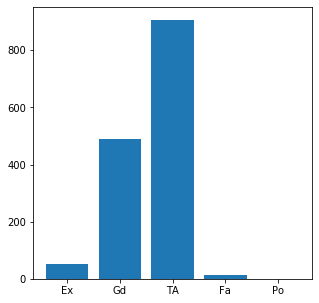

In [152]:
exqual = ['Ex','Gd','TA','Fa','Po']
y = [int(np.sum(x27==x)) for x in exqual]
plt.bar(exqual,y)
plt.rcParams["figure.figsize"] = (10,10)

## X28 ExterCond 집 외관 재료의 현재 상태
수치화 가능

In [153]:
x28 = X.iloc[:,27]
x28.head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: ExterCond, dtype: object

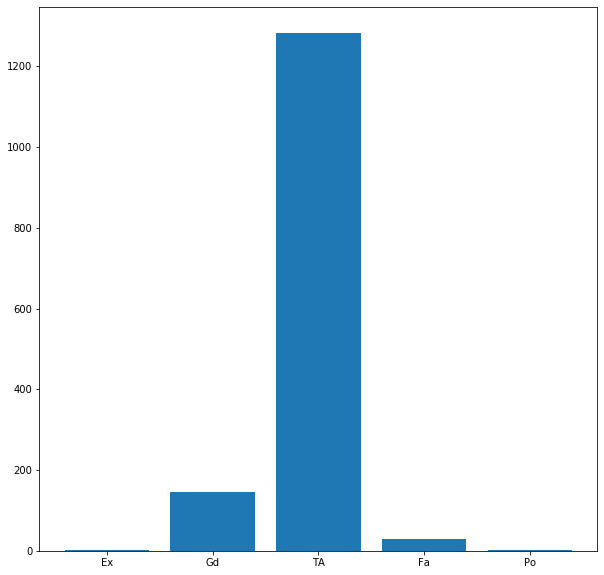

In [154]:
excond = ['Ex','Gd','TA','Fa','Po']
y = [int(np.sum(x28==x)) for x in excond]
plt.bar(excond,y)
plt.rcParams["figure.figsize"] = (10,10)

## X29 Foundation 집 foundation 재료

In [155]:
x29 = X.iloc[:,28]
x29.head()

0     PConc
1    CBlock
2     PConc
3    BrkTil
4     PConc
Name: Foundation, dtype: object

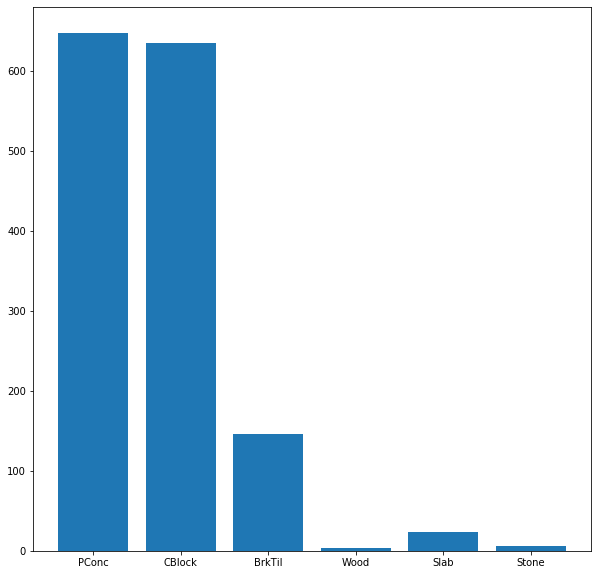

In [156]:
found = x29.drop_duplicates()
y = [int(np.sum(x29==x)) for x in found]
plt.bar(found,y)
plt.rcParams["figure.figsize"] = (10,10)

## X30 BsmtQual basement의 높이
수치화 가능

In [157]:
x30 = X.iloc[:,29]
x30.head()

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

In [159]:
np.sum(pd.isnull(x30)==True)

37

In [160]:
x30 = x30.fillna("nobasement")

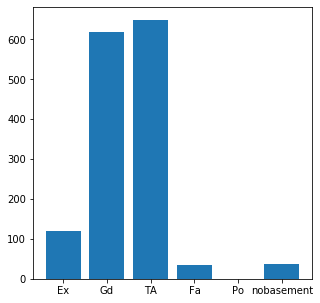

In [164]:
bash = ['Ex','Gd','TA','Fa','Po','nobasement']
y = [int(np.sum(x30==x)) for x in bash]
plt.bar(bash,y)
plt.rcParams["figure.figsize"] = (5,5)

## X31 BsmtCond basement의 상태
수치화 가능

In [165]:
x31 = X.iloc[:,30]
x31.head()

0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object

In [166]:
np.sum(pd.isnull(x31)==True)

37

In [167]:
x31 = x31.fillna("nobasement")

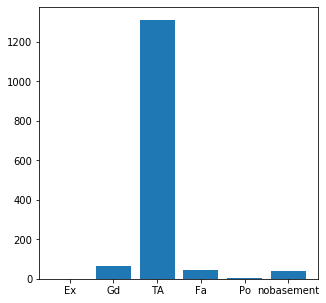

In [168]:
basc = ['Ex','Gd','TA','Fa','Po','nobasement']
y = [int(np.sum(x31==x)) for x in basc]
plt.bar(basc,y)
plt.rcParams["figure.figsize"] = (5,5)

## X32 BsmtExposure basement 노출되어 있는 정도
walkout: 일반적으로 외부에 있는 basement에서 위로 연결되는 계단통로  
garden level: basement가 지하에 있지 않고 땅위에 있는, 문이 위로 열리는 형태

In [169]:
x32 = X.iloc[:,31]
x32.head()

0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object

In [170]:
np.sum(pd.isnull(x32)==True)

38

In [171]:
x32 = x32.fillna("nobasement")

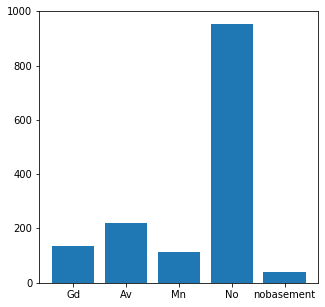

In [172]:
base = ['Gd','Av','Mn','No','nobasement']
y = [int(np.sum(x32==x)) for x in base]
plt.bar(base,y)
plt.rcParams["figure.figsize"] = (5,5)

## X33 BsmtFinType1 basement 양호정도
## X34 BsmtFinSF1 그 공간의 너비
수치화 가능

In [173]:
x33 = X.iloc[:,32]
x33.head()

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

In [174]:
np.sum(pd.isnull(x33)==True)

37

In [175]:
x33 = x33.fillna("nobasement")

In [178]:
x34 = X.iloc[:,33]
x34.head()

0    706
1    978
2    486
3    216
4    655
Name: BsmtFinSF1, dtype: int64

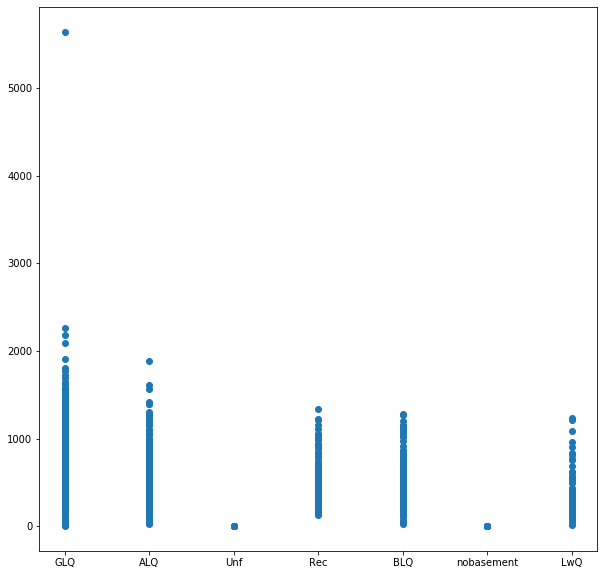

In [185]:
plt.plot(x33,x34,linestyle='none',marker='o')
plt.rcParams["figure.figsize"] = (50,50)

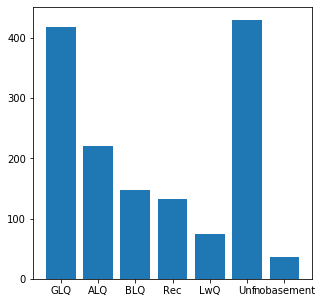

In [177]:
bft1 = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','nobasement']
y = [int(np.sum(x33==x)) for x in bft1]
plt.bar(bft1,y)
plt.rcParams["figure.figsize"] = (5,5)

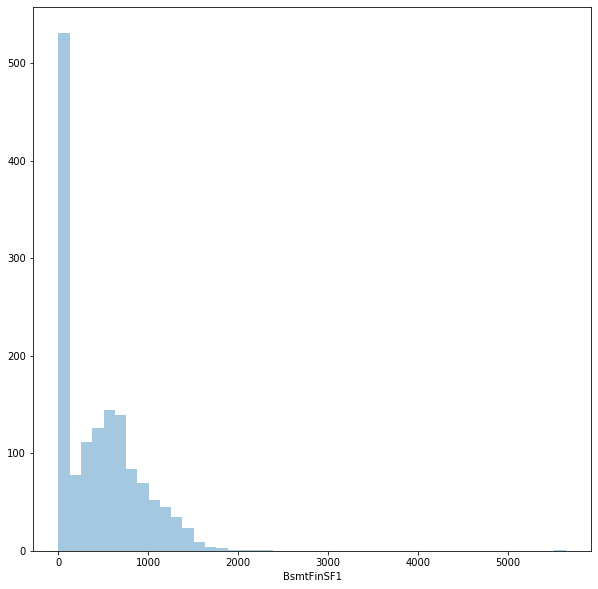

In [186]:
plt.figure(figsize=(10,10))
sns.distplot(x34,kde=False)

## X35 BsmtFinType2 basement 양호정도
## X36 BsmtFinSF2 그 공간의 너비
수치화 가능

In [191]:
x35 = X.iloc[:,34]
x35.head()

0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object

In [192]:
np.sum(pd.isnull(x35)==True)

38

In [193]:
x35 = x35.fillna("nobasement")

In [194]:
x36 = X.iloc[:,35]
x36.head()

0    0
1    0
2    0
3    0
4    0
Name: BsmtFinSF2, dtype: int64

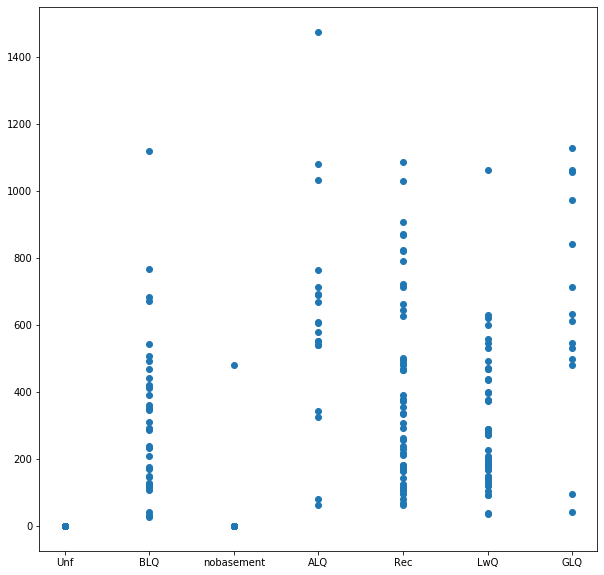

In [197]:
plt.plot(x35,x36,linestyle='none',marker='o')
plt.rcParams["figure.figsize"] = (100,100)

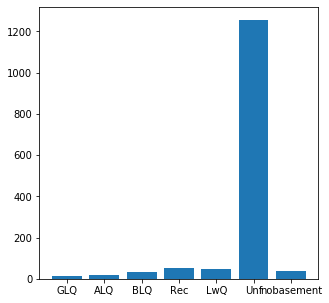

In [199]:
bft2 = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','nobasement']
y = [int(np.sum(x35==x)) for x in bft2]
plt.bar(bft2,y)
plt.rcParams["figure.figsize"] = (10,10)

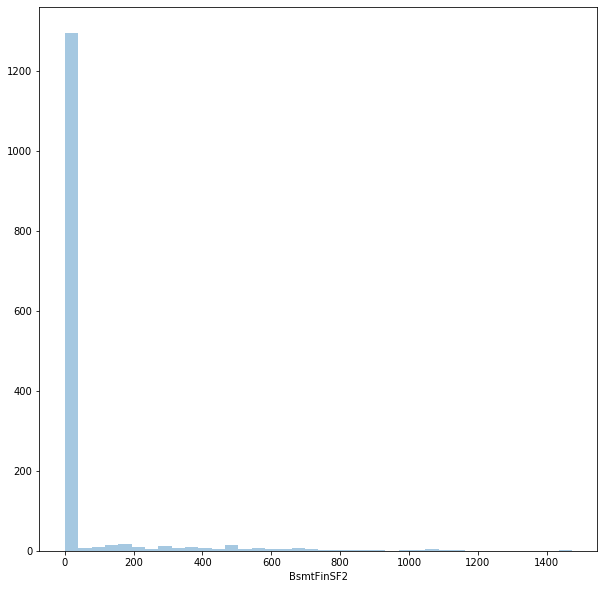

In [200]:
plt.figure(figsize=(10,10))
sns.distplot(x36,kde=False)

## X37 BsmtUnfSF 완공되지 않은 basement 면적

In [201]:
x37 = X.iloc[:,36]
x37.head()

0    150
1    284
2    434
3    540
4    490
Name: BsmtUnfSF, dtype: int64

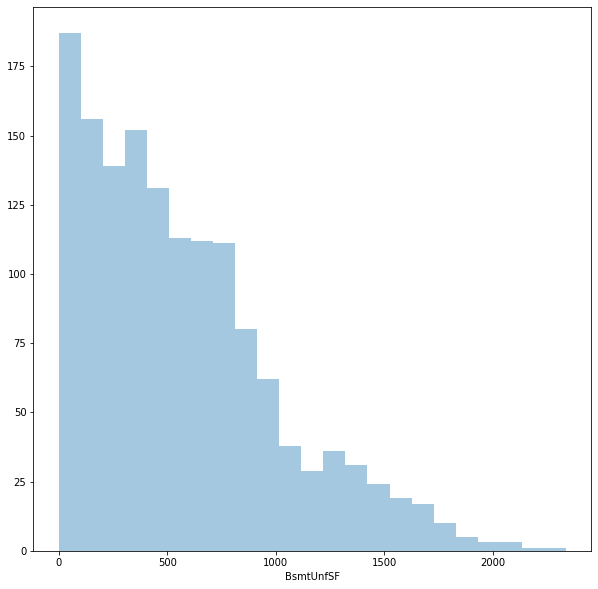

In [202]:
plt.figure(figsize=(10,10))
sns.distplot(x37,kde=False)

## X38 TotalBsmtSF 총 basement 넓이

In [203]:
x38 = X.iloc[:,37]
x38.head()

0     856
1    1262
2     920
3     756
4    1145
Name: TotalBsmtSF, dtype: int64

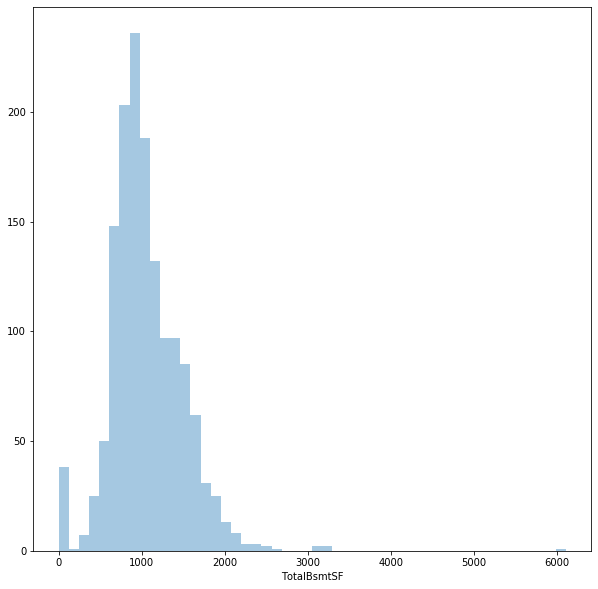

In [204]:
plt.figure(figsize=(10,10))
sns.distplot(x38,kde=False)

## X39 Heating 난방 타입

In [207]:
x39 = X.iloc[:,38]
x39.head()

0    GasA
1    GasA
2    GasA
3    GasA
4    GasA
Name: Heating, dtype: object

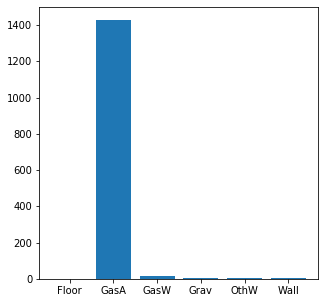

In [209]:
heat = ['Floor','GasA','GasW','Grav','OthW','Wall']
y = [int(np.sum(x39==x)) for x in heat]
plt.bar(heat,y)
plt.rcParams["figure.figsize"] = (5,5)

## X40 HeatingQC 난방 quality와 상태

In [211]:
x40 = X.iloc[:,39]
x40.head()

0    Ex
1    Ex
2    Ex
3    Gd
4    Ex
Name: HeatingQC, dtype: object

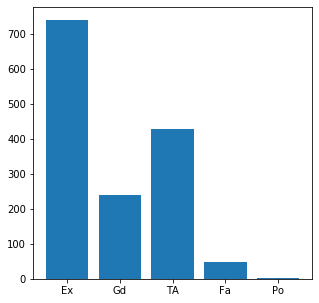

In [212]:
heatq = ['Ex','Gd','TA','Fa','Po']
y = [int(np.sum(x40==x)) for x in heatq]
plt.bar(heatq,y)
plt.rcParams["figure.figsize"] = (5,5)

## X41 CentralAir 중앙냉방여부
0,1 가능

In [214]:
x41 = X.iloc[:,40]
x41.head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: CentralAir, dtype: object

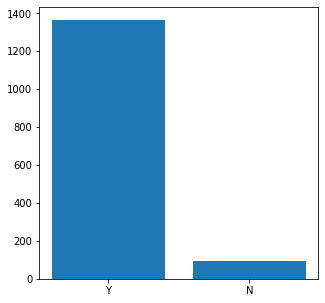

In [215]:
cenair = ['Y','N']
y = [int(np.sum(x41==x)) for x in cenair]
plt.bar(cenair,y)
plt.rcParams["figure.figsize"] = (5,5)

## X42 Electrical 전기 상태

In [216]:
x42 = X.iloc[:,41]
x42.head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

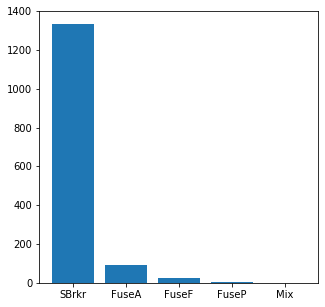

In [217]:
elec = ['SBrkr','FuseA','FuseF','FuseP','Mix']
y = [int(np.sum(x42==x)) for x in elec]
plt.bar(elec,y)
plt.rcParams["figure.figsize"] = (5,5)

## X43 1stFlrSF 1층넓이

In [218]:
x43 = X.iloc[:,42]
x43.head()

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64

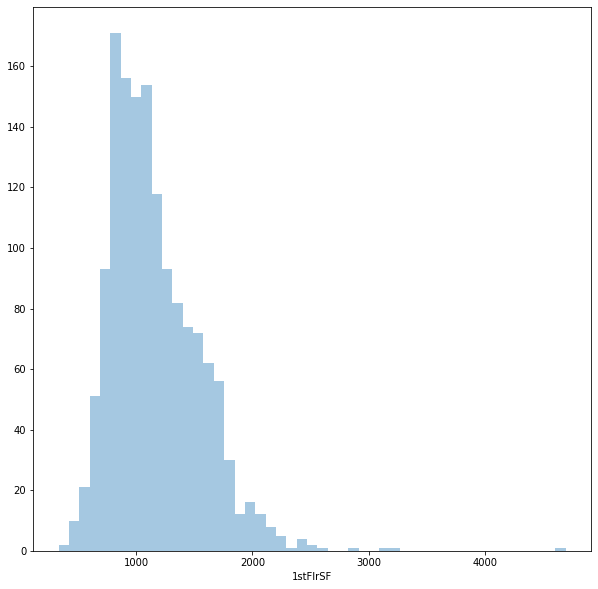

In [219]:
plt.figure(figsize=(10,10))
sns.distplot(x43,kde=False)

## X44 2ndFlrSF 2층 넓이

In [220]:
x44 = X.iloc[:,43]
x44.head()

0     854
1       0
2     866
3     756
4    1053
Name: 2ndFlrSF, dtype: int64

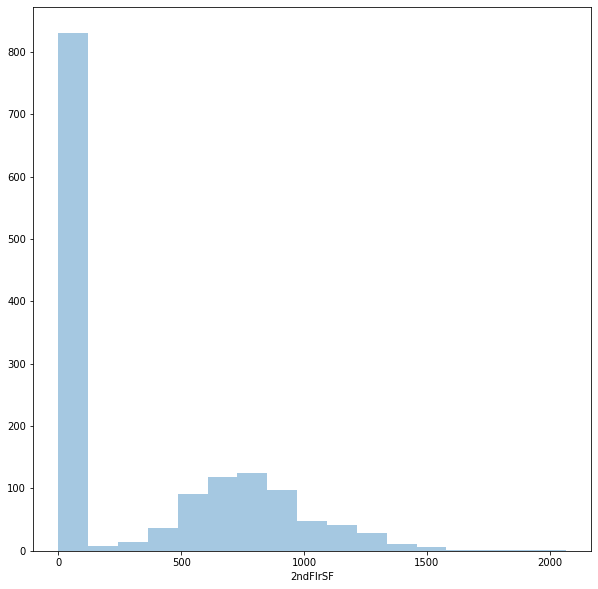

In [221]:
plt.figure(figsize=(10,10))
sns.distplot(x44,kde=False)

## X45 LowQualFinSF 모든 층의 상태 별로인 부분 면적

In [222]:
x45 = X.iloc[:,44]
x45.head()

0    0
1    0
2    0
3    0
4    0
Name: LowQualFinSF, dtype: int64

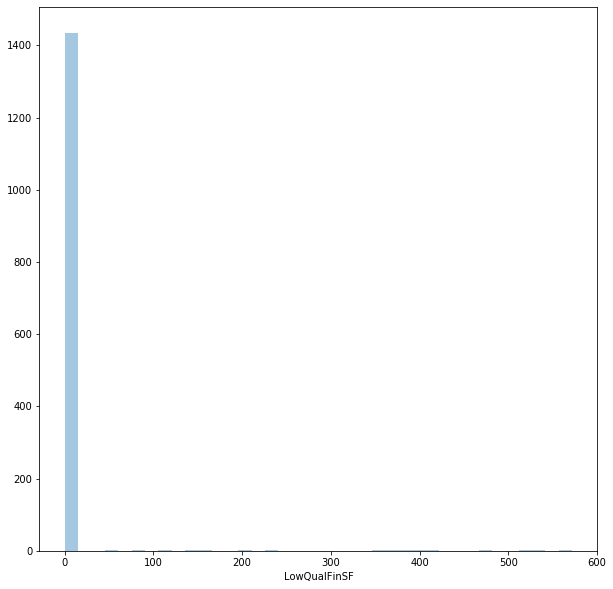

In [223]:
plt.figure(figsize=(10,10))
sns.distplot(x45,kde=False)

## X46 GrLivArea 모든 층의 면적

In [224]:
x46 = X.iloc[:,45]
x46.head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

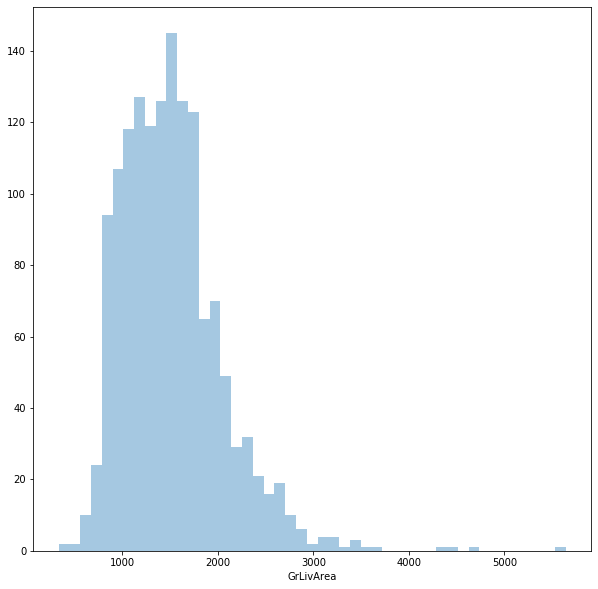

In [225]:
plt.figure(figsize=(10,10))
sns.distplot(x46,kde=False)

## X47 BsmtFullBath basement에 세면대, 변기, 욕조공간이 다 있는 화장실 개수

In [226]:
x47 = X.iloc[:,46]
x47.head()

0    1
1    0
2    1
3    1
4    1
Name: BsmtFullBath, dtype: int64

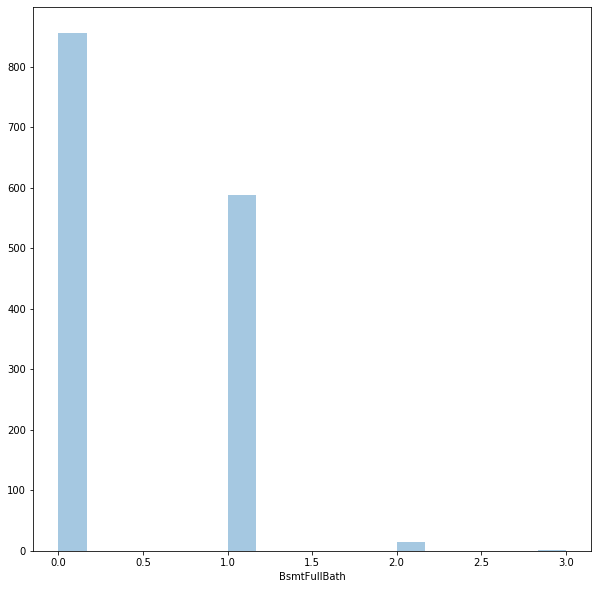

In [227]:
plt.figure(figsize=(10,10))
sns.distplot(x47,kde=False)

## X48 BsmtHalfBath basement에 세면대, 변기 공간만 있는 화장실 개수

In [228]:
x48 = X.iloc[:,47]
x48.head()

0    0
1    1
2    0
3    0
4    0
Name: BsmtHalfBath, dtype: int64

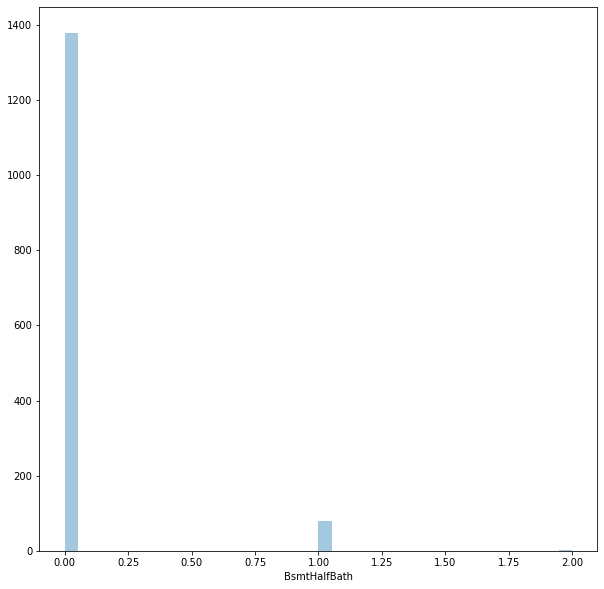

In [229]:
plt.figure(figsize=(10,10))
sns.distplot(x48,kde=False)

## X49 FullBath 지상에 세면대, 변기, 욕조공간이 다 있는 화장실 개수

In [230]:
x49 = X.iloc[:,48]
x49.head()

0    2
1    2
2    2
3    1
4    2
Name: FullBath, dtype: int64

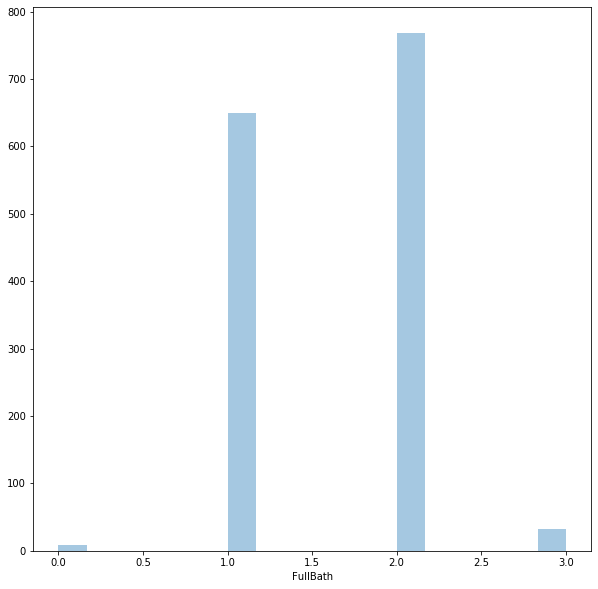

In [231]:
plt.figure(figsize=(10,10))
sns.distplot(x49,kde=False)

## X50 HalfBath 지상에 세면대, 변기 공간만 있는 화장실 개수

In [233]:
x50 = X.iloc[:,49]
x50.head()

0    1
1    0
2    1
3    0
4    1
Name: HalfBath, dtype: int64

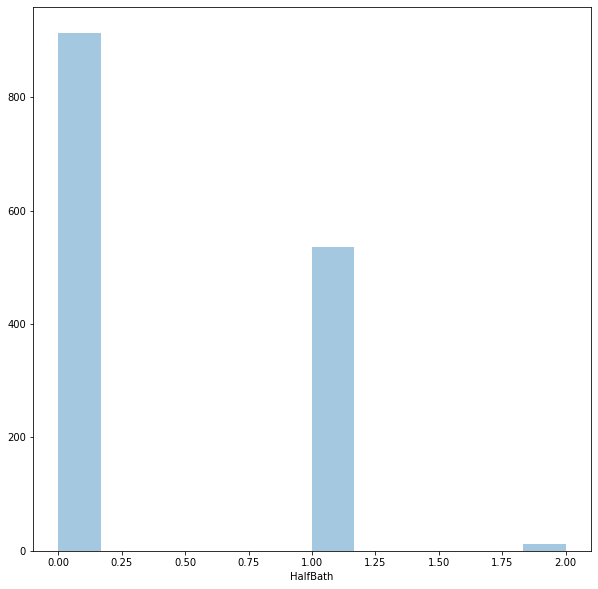

In [234]:
plt.figure(figsize=(10,10))
sns.distplot(x50,kde=False)

## X51 Bedroom 지상 침실 개수

In [235]:
x51 = X.iloc[:,50]
x51.head()

0    3
1    3
2    3
3    3
4    4
Name: BedroomAbvGr, dtype: int64

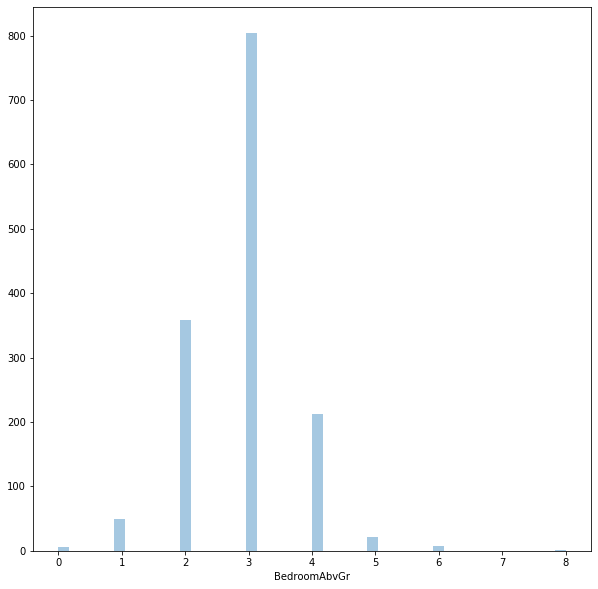

In [236]:
plt.figure(figsize=(10,10))
sns.distplot(x51,kde=False)

## X52 Kitchen 지상 부엌 개수

In [237]:
x52 = X.iloc[:,51]
x52.head()

0    1
1    1
2    1
3    1
4    1
Name: KitchenAbvGr, dtype: int64

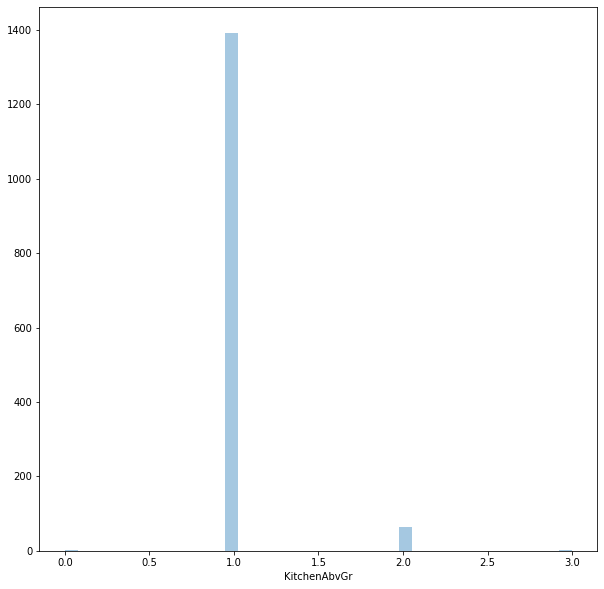

In [238]:
plt.figure(figsize=(10,10))
sns.distplot(x52,kde=False)

## X53 Kitchen Qual 지상 부엌의 상태
수치화 가능

In [239]:
x53 = X.iloc[:,52]
x53.head()

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: KitchenQual, dtype: object

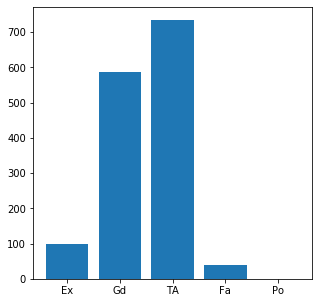

In [241]:
kitchq = ['Ex','Gd','TA','Fa','Po']
y = [int(np.sum(x53==x)) for x in kitchq]
plt.bar(kitchq,y)
plt.rcParams["figure.figsize"] = (5,5)

## X54 TotRmsAbvGrd 지상의 화장실 제외한 방 개수

In [242]:
x54 = X.iloc[:,53]
x54.head()

0    8
1    6
2    6
3    7
4    9
Name: TotRmsAbvGrd, dtype: int64

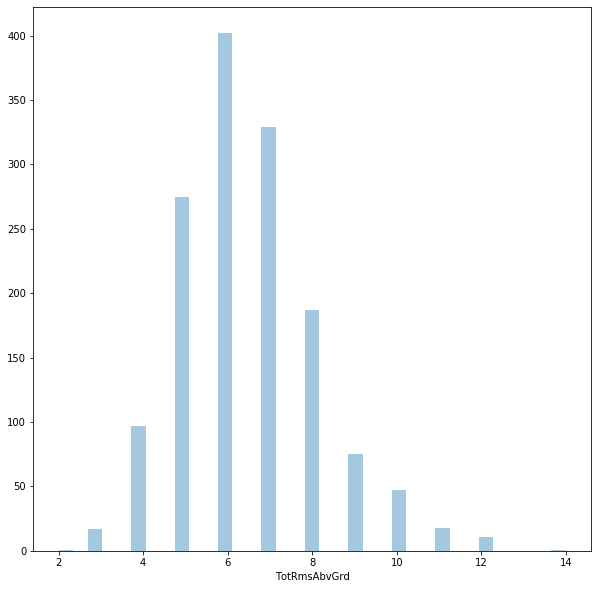

In [243]:
plt.figure(figsize=(10,10))
sns.distplot(x54,kde=False)

## X55 Functional - Home functionality

In [245]:
x55 = X.iloc[:,54]
x55.head()

0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
Name: Functional, dtype: object

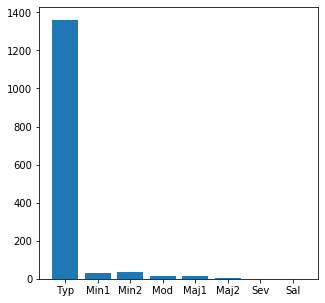

In [246]:
homef = ['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal']
y = [int(np.sum(x55==x)) for x in homef]
plt.bar(homef,y)
plt.rcParams["figure.figsize"] = (5,5)

## X56 Fireplaces 벽난로 개수

In [247]:
x56 = X.iloc[:,55]
x56.head()

0    0
1    1
2    1
3    1
4    1
Name: Fireplaces, dtype: int64

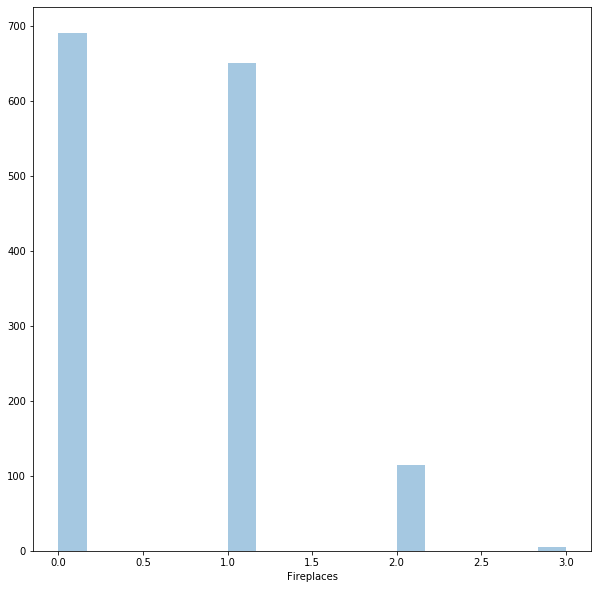

In [248]:
plt.figure(figsize=(10,10))
sns.distplot(x56,kde=False)

## X57 FireplaceQu 벽난로 상태
수치화 가능

In [257]:
x57 = X.iloc[:,56]
x57.head()

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

In [258]:
np.sum(pd.isnull(x57)==True)

690

In [259]:
x57 = x57.fillna("nofireplace")

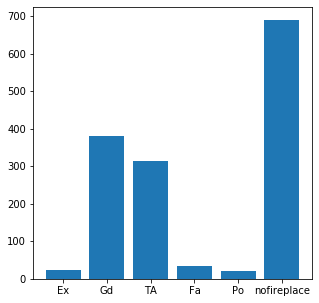

In [260]:
fireq = ['Ex','Gd','TA','Fa','Po','nofireplace']
y = [int(np.sum(x57==x)) for x in fireq]
plt.bar(fireq,y)
plt.rcParams["figure.figsize"] = (5,5)

## X58 GarageType 차고 위치

In [261]:
x58 = X.iloc[:,57]
x58.head()

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

In [262]:
np.sum(pd.isnull(x58)==True)

81

In [263]:
x58 = x58.fillna("nogarage")

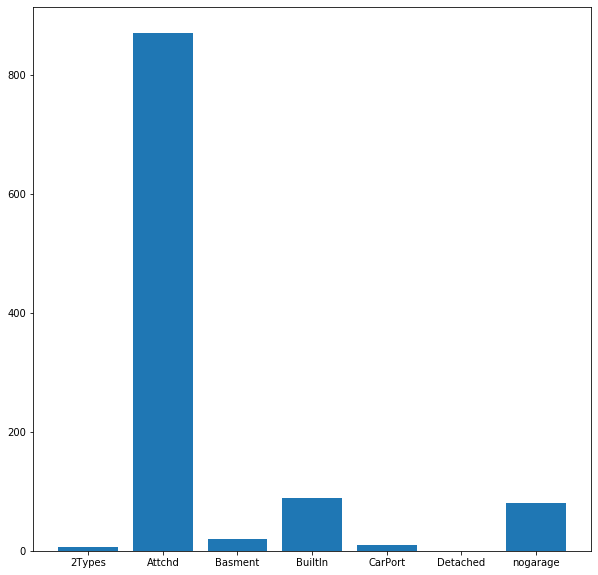

In [266]:
gt = ['2Types','Attchd','Basment','BuiltIn','CarPort','Detached','nogarage']
y = [int(np.sum(x58==x)) for x in gt]
plt.bar(gt,y)
plt.rcParams["figure.figsize"] = (15,15)

## X59 GarageYrBlt 차고가 지어진 연도

In [274]:
x59 = X.iloc[:,58]
x59.head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [275]:
np.sum(pd.isnull(x59)==True)

81

In [276]:
x59 = x59.fillna("nogarage")

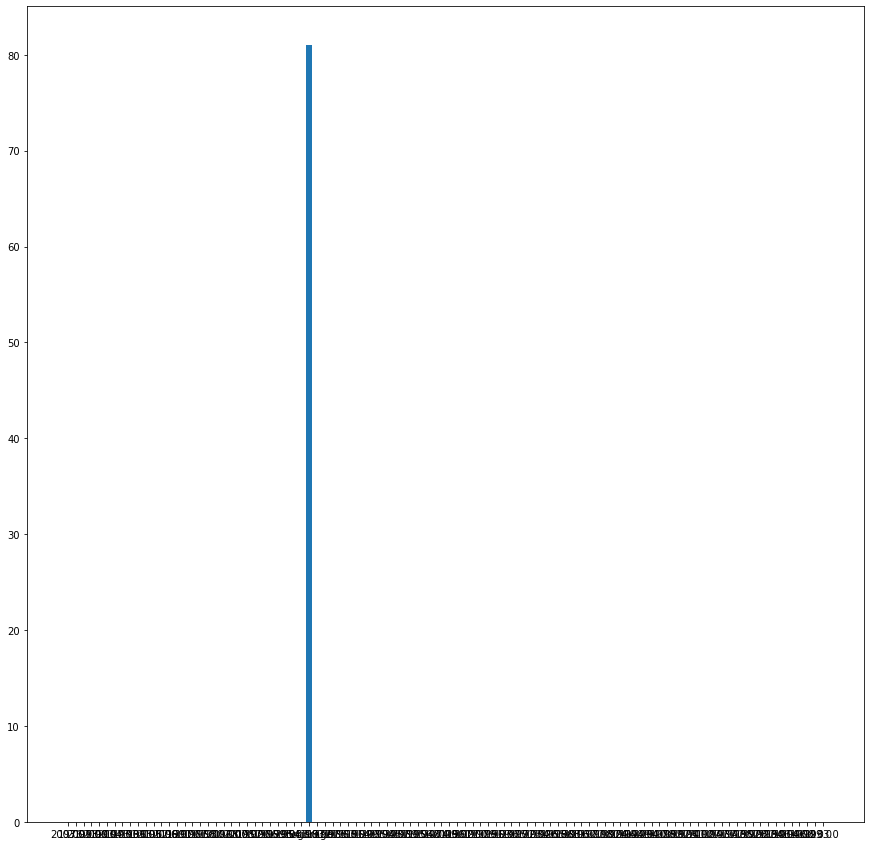

In [281]:
gy = x59.drop_duplicates()
gy = [str(x) for x in gy]
y = [int(np.sum(x59==x)) for x in gy]
plt.bar(gy,y)
plt.rcParams["figure.figsize"] = (5,5)

## X60 GarageFinish 차고 인테리어 완공 정도

In [282]:
x60 = X.iloc[:,59]
x60.head()

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

In [283]:
np.sum(pd.isnull(x60)==True)

81

In [284]:
x60 = x60.fillna("nogarage")

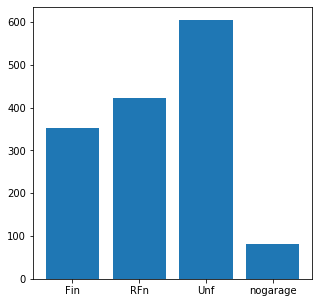

In [286]:
gf = ['Fin','RFn','Unf','nogarage']
y = [int(np.sum(x60==x)) for x in gf]
plt.bar(gf,y)
plt.rcParams["figure.figsize"] = (5,5)

## X61 GarageCars 차고에 차가 몇 대 들어갈 수 있는지

In [287]:
x61 = X.iloc[:,60]
x61.head()

0    2
1    2
2    2
3    3
4    3
Name: GarageCars, dtype: int64

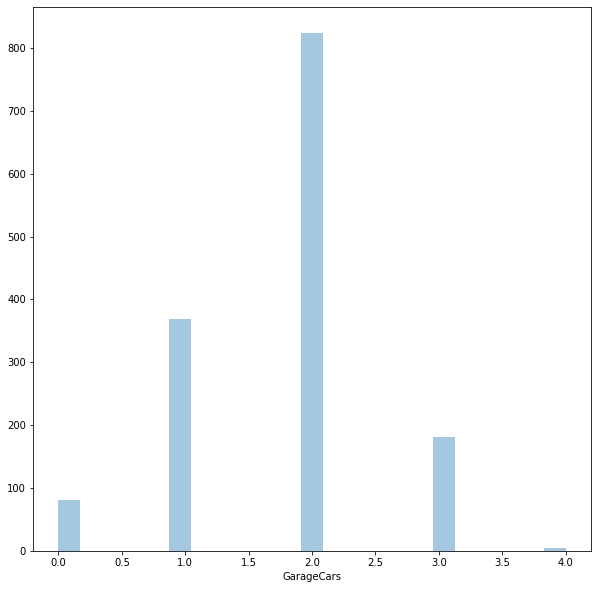

In [288]:
plt.figure(figsize=(10,10))
sns.distplot(x61,kde=False)

## X62 GarageArea 차고 크기

In [289]:
x62 = X.iloc[:,61]
x62.head()

0    548
1    460
2    608
3    642
4    836
Name: GarageArea, dtype: int64

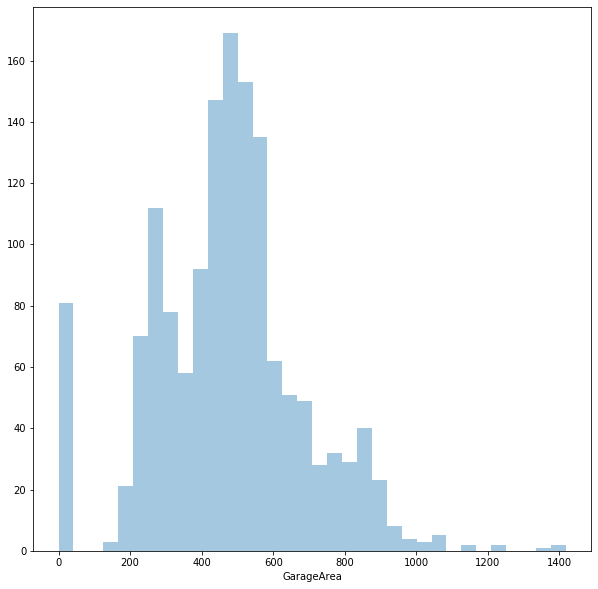

In [290]:
plt.figure(figsize=(10,10))
sns.distplot(x62,kde=False)

## X63 GarageQual 차고 quality
수치화 가능

In [291]:
x63 = X.iloc[:,62]
x63.head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object

In [292]:
np.sum(pd.isnull(x63)==True)

81

In [294]:
x63= x63.fillna("nogarage")

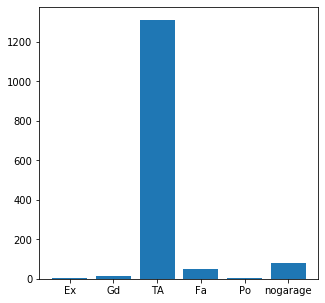

In [296]:
gq = ['Ex','Gd','TA','Fa','Po','nogarage']
y = [int(np.sum(x63==x)) for x in gq]
plt.bar(gq,y)
plt.rcParams["figure.figsize"] = (5,5)

## X64 GarageCond 차고 현재 상태
수치화 가능

In [297]:
x64 = X.iloc[:,63]
x64.head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object

In [298]:
np.sum(pd.isnull(x64)==True)

81

In [299]:
x64= x64.fillna("nogarage")

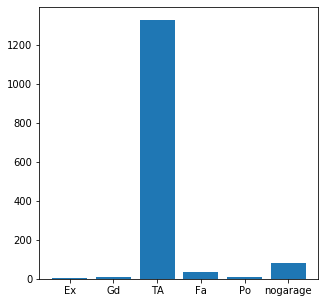

In [300]:
gq = ['Ex','Gd','TA','Fa','Po','nogarage']
y = [int(np.sum(x64==x)) for x in gq]
plt.bar(gq,y)
plt.rcParams["figure.figsize"] = (5,5)

## X65 PavedDrive 사유차도의 포장 정도
수치화 가능

In [301]:
x65 = X.iloc[:,64]
x65.head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: PavedDrive, dtype: object

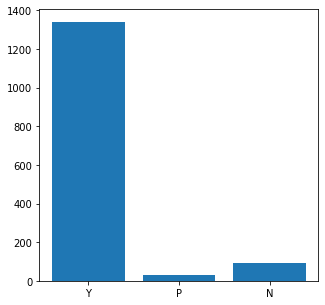

In [302]:
paved = ['Y','P','N']
y = [int(np.sum(x65==x)) for x in paved]
plt.bar(paved,y)
plt.rcParams["figure.figsize"] = (5,5)

## X66 WoodDeckSF wood deck 공간 넓이

In [303]:
x66 = X.iloc[:,65]
x66.head()

0      0
1    298
2      0
3      0
4    192
Name: WoodDeckSF, dtype: int64

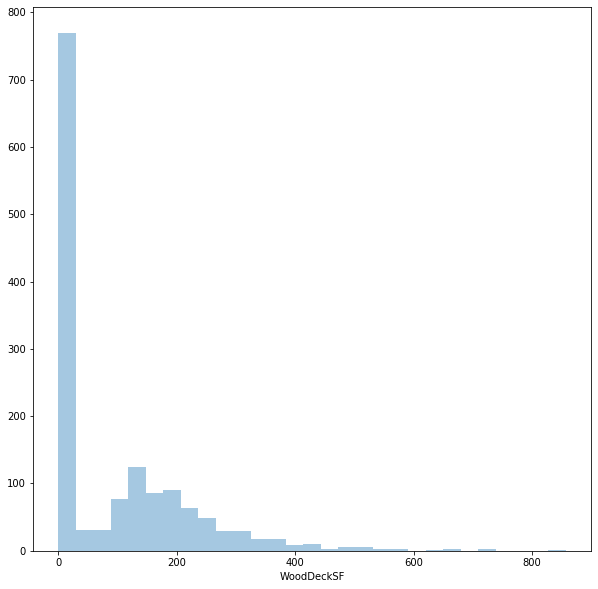

In [304]:
plt.figure(figsize=(10,10))
sns.distplot(x66,kde=False)

## X67 OpenPorchSF open proch 공간 넓이

In [305]:
x67 = X.iloc[:,66]
x67.head()

0    61
1     0
2    42
3    35
4    84
Name: OpenPorchSF, dtype: int64

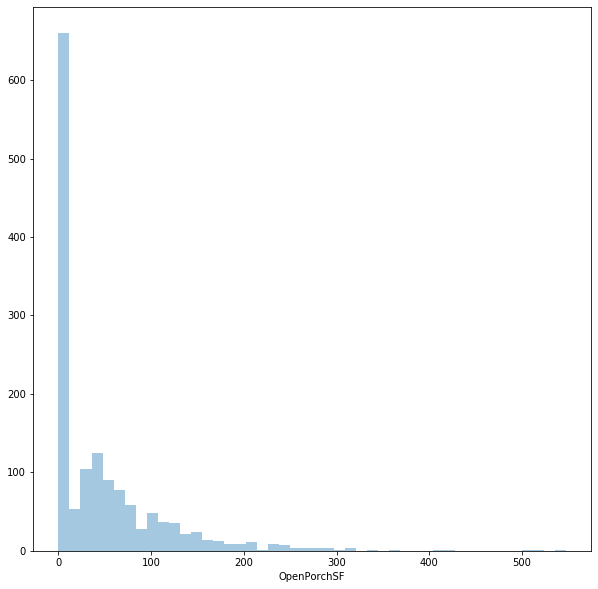

In [307]:
plt.figure(figsize=(10,10))
sns.distplot(x67,kde=False)

## X68 EnclosedPorch enclosed porch 공간 넓이

In [308]:
x68 = X.iloc[:,67]
x68.head()

0      0
1      0
2      0
3    272
4      0
Name: EnclosedPorch, dtype: int64

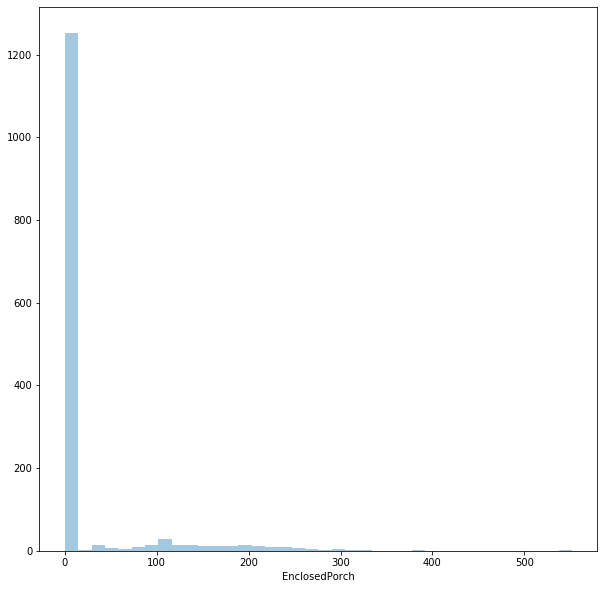

In [309]:
plt.figure(figsize=(10,10))
sns.distplot(x68,kde=False)

## X69 3SsnPorch Three season porch 공간 넓이

In [310]:
x69 = X.iloc[:,68]
x69.head()

0    0
1    0
2    0
3    0
4    0
Name: 3SsnPorch, dtype: int64

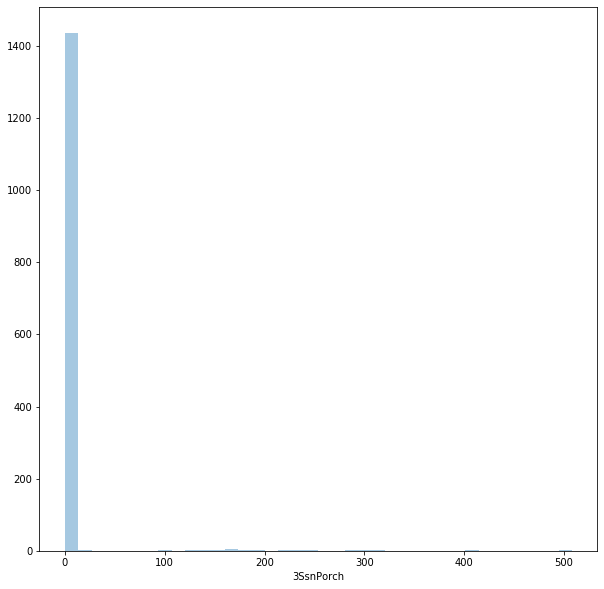

In [311]:
plt.figure(figsize=(10,10))
sns.distplot(x69,kde=False)

## X70 ScreenPorch 공간 넓이

In [312]:
x70 = X.iloc[:,69]
x70.head()

0    0
1    0
2    0
3    0
4    0
Name: ScreenPorch, dtype: int64

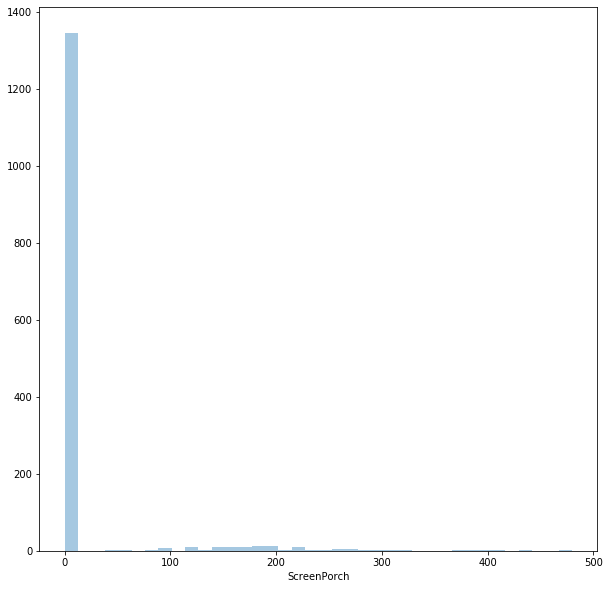

In [313]:
plt.figure(figsize=(10,10))
sns.distplot(x70,kde=False)

## X71 PoolArea 수영장 넓이

In [56]:
x71 = X.iloc[:,70]
x71.head()

0    0
1    0
2    0
3    0
4    0
Name: PoolArea, dtype: int64

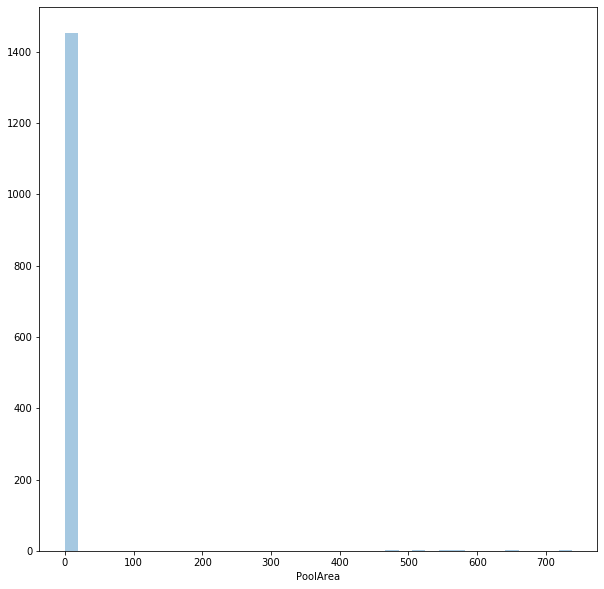

In [57]:
plt.figure(figsize=(10,10))
sns.distplot(x71,kde=False)

## X72 PoolQC 수영장 quality

In [58]:
x72 = X.iloc[:,71]
x72.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

In [59]:
np.sum(pd.isnull(x72)==True)

1453

In [60]:
x72 = x72.fillna("nopool")

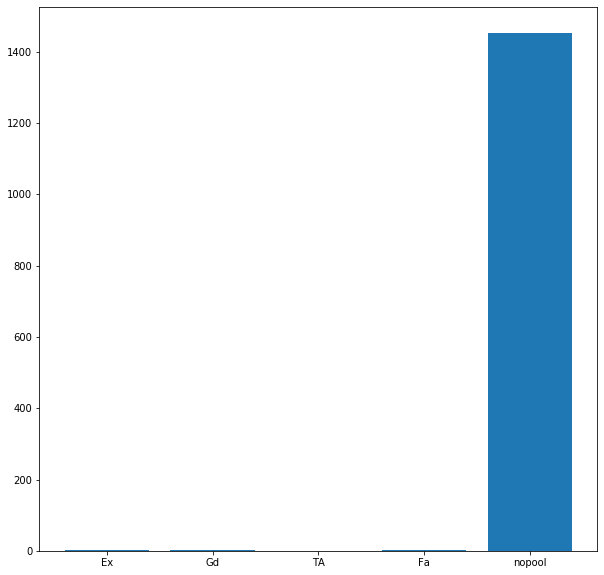

In [63]:
pq = ['Ex','Gd','TA','Fa','nopool']
y = [int(np.sum(x72==x)) for x in pq]
plt.bar(pq,y)
plt.rcParams["figure.figsize"] = (5,5)

## X73 Fence 울타리 quality

In [71]:
x73 = X.iloc[:,72]
x73.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

In [72]:
np.sum(pd.isnull(x73)==True)

1179

In [73]:
x73 = x73.fillna("nofence")

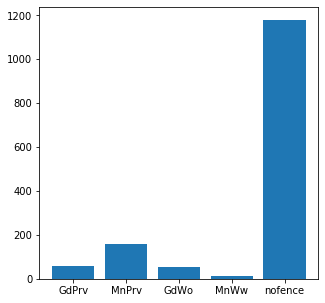

In [74]:
fq = ['GdPrv','MnPrv','GdWo','MnWw','nofence']
y = [int(np.sum(x73==x)) for x in fq]
plt.bar(fq,y)
plt.rcParams["figure.figsize"] = (5,5)

## X74 MiscFeature 엘레베이터, 2번째 차고, 다른 옵션, 헛간, 테니스코트 등 다른 특징

In [75]:
x74 = X.iloc[:,73]
x74.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: MiscFeature, dtype: object

In [76]:
np.sum(pd.isnull(x74)==True)

1406

In [77]:
x74 = x74.fillna("nofeature")

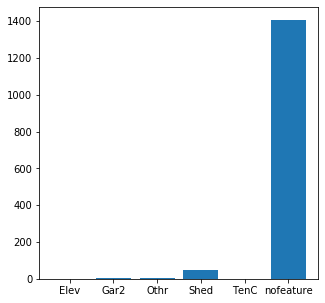

In [78]:
mf = ['Elev','Gar2','Othr','Shed','TenC','nofeature']
y = [int(np.sum(x74==x)) for x in mf]
plt.bar(mf,y)
plt.rcParams["figure.figsize"] = (5,5)

## X75 MiscVal 부가적 특징의 경제적 가치

In [79]:
x75 = X.iloc[:,74]
x75.head()

0    0
1    0
2    0
3    0
4    0
Name: MiscVal, dtype: int64

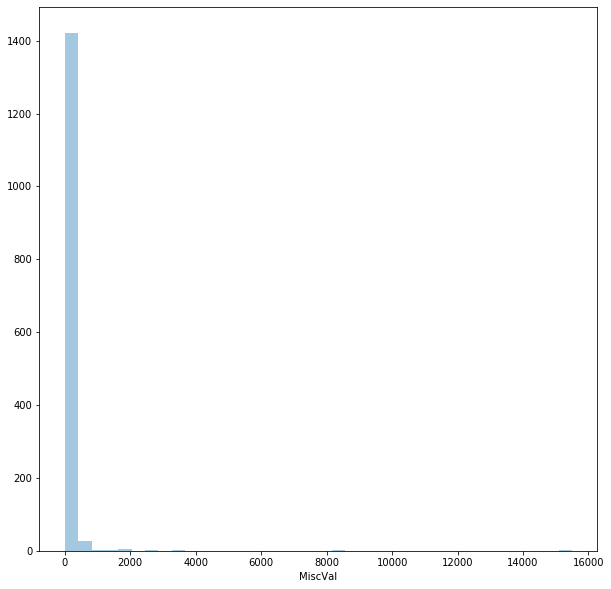

In [80]:
plt.figure(figsize=(10,10))
sns.distplot(x75,kde=False)

## X76 MoSold 집이 팔린 월

In [81]:
x76 = X.iloc[:,75]
x76.head()

0     2
1     5
2     9
3     2
4    12
Name: MoSold, dtype: int64

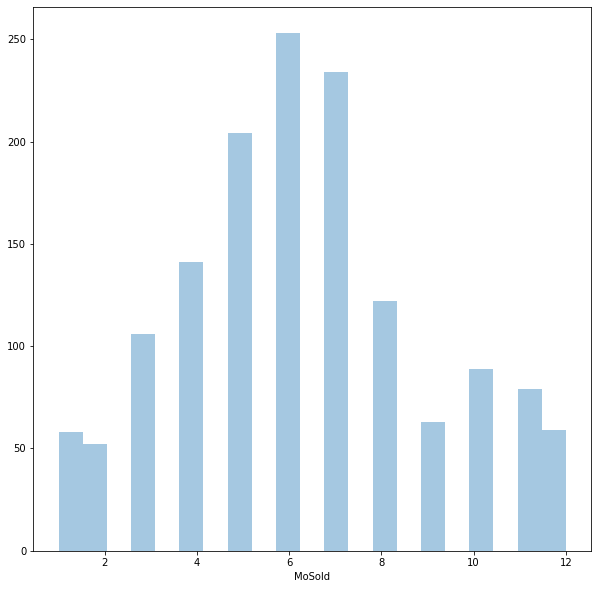

In [82]:
plt.figure(figsize=(10,10))
sns.distplot(x76,kde=False)

## X77 YrSold 집이 팔린 연도

In [83]:
x77 = X.iloc[:,76]
x77.head()

0    2008
1    2007
2    2008
3    2006
4    2008
Name: YrSold, dtype: int64

([<matplotlib.axis.XTick at 0x187962f0208>,
 <a list of 5 Text xticklabel objects>)

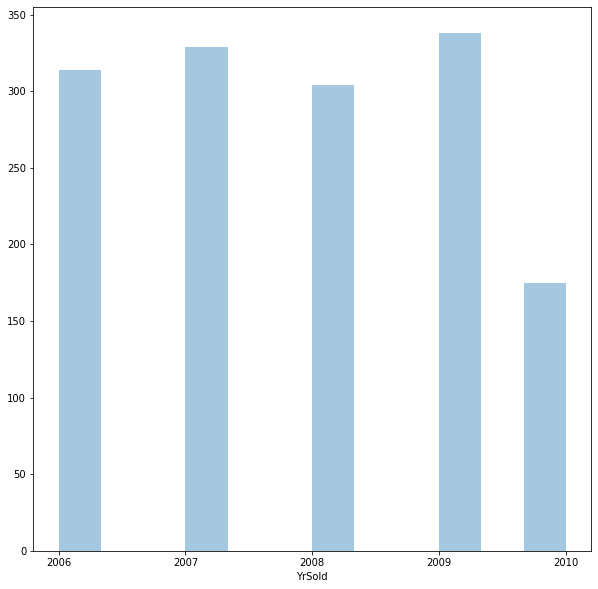

In [87]:
plt.figure(figsize=(10,10))
sns.distplot(x77,kde=False)
plt.xticks([2006, 2007, 2008, 2009, 2010])

## X78 SaleType 집계약의 종류

In [88]:
x78 = X.iloc[:,77]
x78.head()

0    WD
1    WD
2    WD
3    WD
4    WD
Name: SaleType, dtype: object

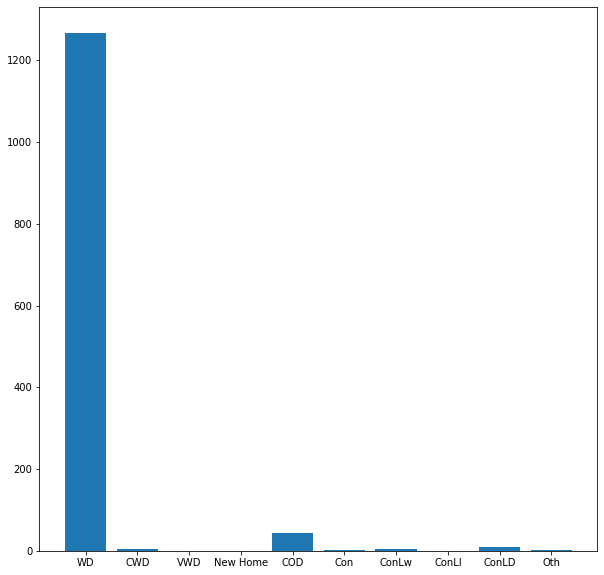

In [91]:
st = ['WD','CWD','VWD','New Home','COD','Con','ConLw','ConLl','ConLD','Oth']
y = [int(np.sum(x78==x)) for x in st]
plt.bar(st,y)
plt.rcParams["figure.figsize"] = (15,15)

## X79 SaleCondition 판매조건

In [92]:
x79 = X.iloc[:,78]
x79.head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

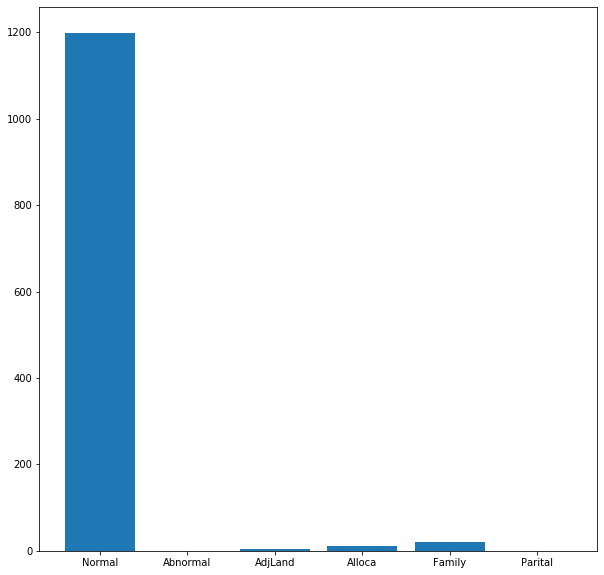

In [98]:
sc = ['Normal','Abnormal','AdjLand','Alloca','Family','Parital']
y = [int(np.sum(x79==x)) for x in sc]
plt.bar(sc,y)
plt.rcParams["figure.figsize"] = (10,10)

## X80 SalePrice 판매가격

In [99]:
x80 = X.iloc[:,79]
x80.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

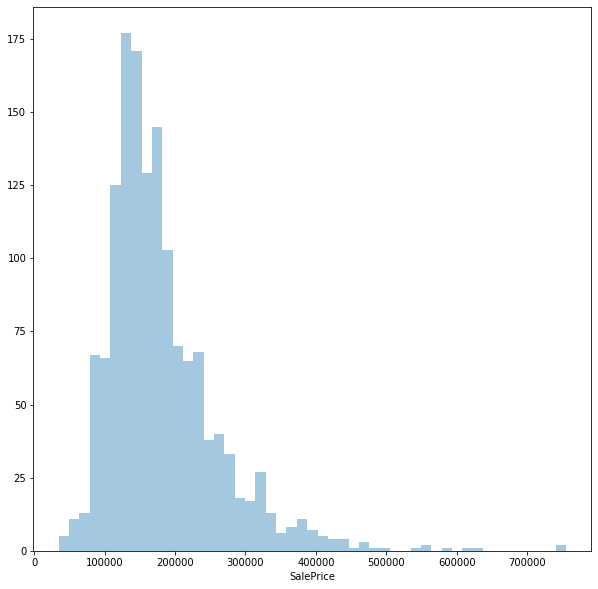

In [100]:
plt.figure(figsize=(10,10))
sns.distplot(x80,kde=False)